# Kaggle Titanic - ML from Disaster

The famous Kaggle Titanic competition.

Steps to learn
1. take Kaggle ML intro course
2. take sci-kit learn course on datacamp
3. get data on Jupyter
4. clean the data (use fill values from pandas)
5. begin training a model and generating predictions

Important key concepts:
- The training set is used to build the machine learning models. The ground truth is provided in this (whether they survived or not) so the model learns (aka supervised learning).
- In ML, features are the input variables (the independent variables) used to make predictions. They represent specific properties or characteristics of a dataset. Features are important because they provide the information that the model learns from.

In [24]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

train = pd.read_csv("train.csv") # the data in this file will be used to train the data
test = pd.read_csv("test.csv") # the data in this file will be used to test our model which we built with the train data
gender = pd.read_csv("gender_submission.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



# Let's see what we have in our columns
- __survival__    Survival	0 = No, 1 = Yes
- __pclass__	  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- __sex__	  Sex
- __Age__	  Age in years
- __sibsp__	  # of siblings / spouses aboard the Titanic
- __parch__	  # of parents / children aboard the Titanic
- __ticket__ 	Ticket number
- __fare__	  Passenger fare
- __cabin__  	Cabin number
- __embarked__  	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable notes:
- __pclass:__ A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower
- __age:__ Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- __sibsp:__ The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)
- __parch:__ The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.


<BarContainer object of 1 artists>

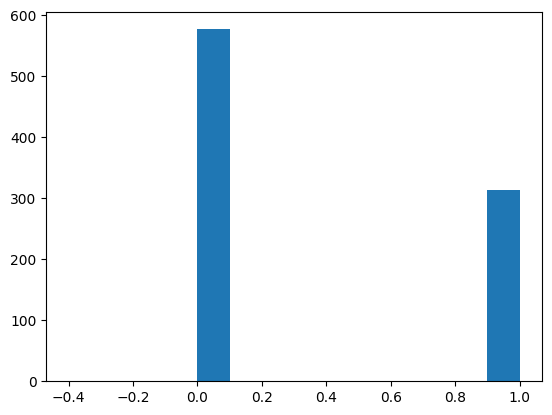

In [68]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(train.Sex)

num_males = 0
num_females = 0
for sex in train.Sex:
    if sex == "male":
        num_males += 1

for sex in train.Sex:
    if sex == "female":
        num_females += 1

plt.bar(num_males, num_females)

In [25]:
train.info()
print()
train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Cleaning and Feature Engineering

Ok now let's identify what features are relevant in training our model. We will choose:
- Pclass (Passenger class)
- Sex
- Fare

In order for us to use Sex, we need to convert it to a numeric value. We will convert male to 0 and female to 1.


In [26]:
# let's use Pclass, Sex, and Fare. We will clean the data in train and test

train["Sex"] = train["Sex"].map({"male": 0, "female": 1}) # converts the strings in train to binary numeric values
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})  # converts the strings in test to binary numeric values

X = train[["Pclass", "Sex", "Fare"]]
X_test = test[["Pclass", "Sex", "Fare"]]
X.head()

,Pclass,Sex,Fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500


Now we will assign our prediction target which by convention is usually y.

In [28]:
y = train["Survived"] # or y = train.Survived

# Steps to building a model
1. __Define:__ What type of model will it be? What model is best for the problem I am trying to solve?
2. __Fit:__ Capture patterns from the provided data. This is the heart of modeling
3. __Predict:__ Run data through the model and predict
4. __Evaluate:__ Evaluate the model and see how accurate it is in its prediction

In [9]:
from sklearn.tree import DecisionTreeRegressor
# we will use a decision tree model for this

# learns pattern in the data like the if tree we looked at.
titanic_model = DecisionTreeRegressor(random_state=1) # random-state=1 fixes randomness (results are reproducable)
titanic_model.fit(X, y) # X is the independent variable and y is the dependent variable

titanic_model.predict(X)

array([0.        , 1.        , 0.6       , 1.        , 0.12195122,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.12195122, 0.        , 0.5       ,
       1.        , 0.        , 0.14285714, 0.        , 1.        ,
       0.2       , 0.14285714, 1.        , 0.75      , 0.        ,
       1.        , 0.1       , 0.        , 1.        , 0.02702703,
       0.        , 1.        , 0.66666667, 0.125     , 0.        ,
       0.2       , 0.15384615, 0.12195122, 0.        , 1.        ,
       0.        , 0.66666667, 0.02702703, 1.        , 1.        ,
       0.12195122, 0.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.85714286, 0.        ,
       0.75      , 0.875     , 0.15384615, 1.        , 0.        ,
       0.15384615, 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.875     , 0.        , 0.6       , 0.09090909,
       0.125     , 0.        , 0.        , 0.        , 0.71428

#### Predictions
We now have probabilities for each passenger of survival on the Titanic. The closer the number is to 1, the more likely they are to survive. Looking up online, the percentage of people who died on the Titanic was roughly 63%. With the data our model used to train, it predicted 61% of the people had a greater than 50% chance of dying (550/891), pretty much accurate with real life.

In [12]:
num_died = 0
for x in (titanic_model.predict(X)):
    if x < 0.5:
        num_died += 1

print(num_died)

550


# Evaluating the Model

Now we evaluate the model. We need to use our test data for this. If we use our regular training data, we will get innacurate results when we actually deploy the model in a real scenario. We can split data using from sklearn.model_select import train_test_split, however, we already have test data so we will do the following:

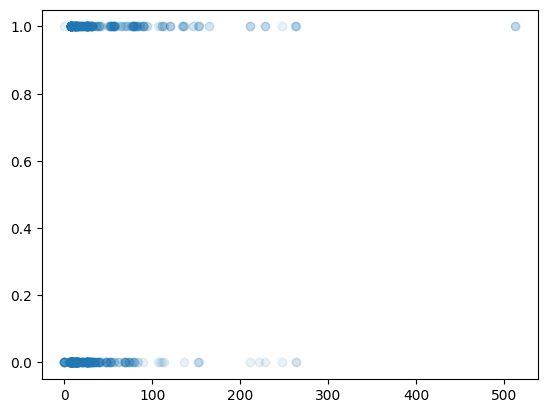

In [64]:
# in this scenario, we just predict and generate a file to submit to Kaggle. our current prediction generates 78% accuracy. not bad

prediction = titanic_model.predict(X_test)
# print(prediction)

plt.scatter(train.Fare, train.Survived, alpha=0.1)

submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": prediction.astype(int)})
# submission.to_csv("submission.csv", index=False)

# Evaluating the Model using test_train_split
Here we will import test_train_split and split our train data to use it to see how accurate our model is using mean absolute error (MAE)

In [30]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, random_state=1) # remember X is our original features we chose and y is the boolean (died or not)

titanic_model2 = DecisionTreeRegressor(random_state=1) # let's create a new model and fit
titanic_model2.fit(train_X, train_Y)

prediction = titanic_model2.predict(test_X) # predicts using our split data (untrained)
mean_absolute_error(test_Y, prediction) # the order of the arguments does not matter


0.20087712486815626